# 파이썬 머신러닝 스터디
## [파이썬 완벽가이드 3단원_평가]

머신러닝은 데이터 가공/변환, 모델 학습/예측, 그리고 평가(Evaluation)의 프로세스로 구성<br>
성능 평가 지표(Evaluation Metric)는 일반적으로 모델이 분류냐 회귀냐에 따라 여러 종류로 나뉨. 
* 회귀의 경우 대부분 실제값과 예측값의 오차 평균값에 기반합니다. 예를 들어 오차에 절댓값을 씌운 뒤 평균 오차를 구하거나 오차의 제곱 값에 루트를 씌운 뒤 평균 오차를 구하는 방법과 같이 기본적으로 예측 오차를 가지고 정규화 수준을 재가공하는 방법이 회귀의 성능 평가 지표 유형
* 분류의 평가방법도 일반적으로는 실제 결과 데이터와 예측 결과 데이터가 얼마나 정확하고 오류가 적게 발생하는가에 기반하지만. 단순히 이러한 정확도만 가지고 판단했다가는 잘못된 평가 결과에 빠질 수 있다. 본 장에서는 분류에 사용되는 성능 평가 지표에 대해서 자세히 알아볼 것. 특히 0과 1로 결정값이 한정되는 이진 분류의 성능 평가 지표에 대해서 집중적으로 설명. 0이냐, 1이냐 혹은 긍정/부정을 판단하는 이진 분류에서는 정확도보다는 다른 성능 평가 지표가 더 중요시되는 경우가 많다.
> * 분류의 성능 평가 지표
>> * 정확도(Accuracy)
>> * 오차행렬(Confusion Matrix)
>> * 정밀도(Precision)
>> * 재현율(Recall)
>> *  F1 스코어
>> *  ROC AUC<br><br>
분류는 결정 클래스 값 종류의 유형에 따라 긍정/부정과 같은 2개의 결괏값만을 가지는 이진 분류와 여
러 개의 결정 클래스 값을 가지는 멀티 분류로 나뉠 수 있다. 위에서 언급한 분류의 성능 지표는 이
진/멀티 분류 모두에 적용되는 지표이지만. 특히 이진 분류에서 더욱 중요하게 강조하는 지표


**01. 정확도(Accuracy)**<br>
: 실제 데이터에서 예측 데이터가 얼마나 같은지를 판단하는 지표<br>
**{정확도 = 예측결과가 동일한 데이터 건수 / 전체 예측 데이터 건수}**<br><br>
정확도는 직관적으로 모델 예측 성능을 나타내는 평가 지표. 하지만 이진 분류의 경우 데이터의
구성에 따라 ML 모델의 성능을 왜곡할 수 있기 때문에 정확도 수치 하나만 가지고 성능을 평가하지 않
는다.

In [3]:
import sklearn
import numpy as np
from sklearn.base import BaseEstimator

class MyDummyClassifier(BaseEstimator):
    # fit( ) 메소드는 아무것도 학습하지 않음. 
    def fit(self, X , y=None):
        pass
    
    # predict( ) 메소드는 단순히 Sex feature가 1 이면 0 , 그렇지 않으면 1 로 예측함. 
    def predict(self, X):
        pred = np.zeros( ( X.shape[0], 1 ))
        for i in range (X.shape[0]) :
            if X['Sex'].iloc[i] == 1:
                pred[i] = 0
            else :
                pred[i] = 1
        
        return pred
#단순히 Sex 피처가 1이면 0, 그렇지 않으면 1로 예측하는 매우 단순한 Classifier

In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(),inplace=True)
    df['Cabin'].fillna('N',inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    df['Fare'].fillna(0,inplace=True)
    return df

# 머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
    return df

# 레이블 인코딩 수행. 
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 Data Preprocessing 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [4]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 원본 데이터를 재로딩, 데이터 가공, 학습데이터/테스트 데이터 분할. 
titanic_df = pd.read_csv("C:\\Users\\Administrator\\Documents\\titanic_train.csv", encoding = "cp949", engine = "python")
y_titanic_df = titanic_df['Survived']
X_titanic_df= titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)
X_train, X_test, y_train, y_test=train_test_split(X_titanic_df, y_titanic_df, \
                                                  test_size=0.2, random_state=0)

# 위에서 생성한 Dummy Classifier를 이용하여 학습/예측/평가 수행. 
myclf = MyDummyClassifier()
myclf.fit(X_train ,y_train)

mypredictions = myclf.predict(X_test)
print('Dummy Classifier의 정확도는: {0:.4f}'.format(accuracy_score(y_test , mypredictions)))

Dummy Classifier의 정확도는: 0.7877


=> 이렇게 단순한 알고리즘으로 예측을 하더라도 데이터의 구성에 따라 정확도 결과는 약 78.77%로 꽤
높은 수치가 나올 수 있기에 정확도를 평가 지표로 사용할 때는 매우 신중해야 함. 
특히 정확도는
불균형한(imbalanced) 레이블 값 분포에서 ML 모델의 성능을 판단할 경우, 적합한 평가 지표가 아님

In [5]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

class MyFakeClassifier(BaseEstimator):
    def fit(self,X,y):
        pass
    
    # 입력값으로 들어오는 X 데이터 셋의 크기만큼 모두 0값으로 만들어서 반환
    def predict(self,X):
        return np.zeros( (len(X), 1) , dtype=bool)

# 사이킷런의 내장 데이터 셋인 load_digits( )를 이용하여 MNIST 데이터 로딩
digits = load_digits()

print(digits.data)
print("### digits.data.shape:", digits.data.shape)
print(digits.target)
print("### digits.target.shape:", digits.target.shape)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
### digits.data.shape: (1797, 64)
[0 1 2 ... 8 9 8]
### digits.target.shape: (1797,)


In [6]:
digits.target == 7

array([False, False, False, ..., False, False, False])

In [7]:
# digits번호가 7번이면 True이고 이를 astype(int)로 1로 변환, 7번이 아니면 False이고 0으로 변환. 
y = (digits.target == 7).astype(int)
X_train, X_test, y_train, y_test = train_test_split( digits.data, y, random_state=11)

In [8]:
# 불균형한 레이블 데이터 분포도 확인. 
print('레이블 테스트 세트 크기 :', y_test.shape)
print('테스트 세트 레이블 0 과 1의 분포도')
print(pd.Series(y_test).value_counts())

# Dummy Classifier로 학습/예측/정확도 평가
fakeclf = MyFakeClassifier()
fakeclf.fit(X_train , y_train)
fakepred = fakeclf.predict(X_test)
print('모든 예측을 0으로 하여도 정확도는:{:.3f}'.format(accuracy_score(y_test , fakepred)))

레이블 테스트 세트 크기 : (450,)
테스트 세트 레이블 0 과 1의 분포도
0    405
1     45
dtype: int64
모든 예측을 0으로 하여도 정확도는:0.900


=> 단순히 predict()의 결과를 np.zeros()로 모두 0 값으로 반환함에도 불구하고 450개의 테스트 데이
터 세트에 수행한 예측 정확도는 90%. 단지 모든 것을 0으로만 예측해도 MyFakeClassifier의
정확도가 90%로 유수의 ML 알고리즘과 어깨를 겨룰 수 있다는 것은 말도 안 되는 결과<br><br>
이처럼 정확도 평가 지표는 불균형한 레이블 데이터 세트에서는 성능 수치로 사용돼서는 안 된다.
정확도가 가지는 분류 평가 지표로서 이러한 한계점을 극복하기 위해 여러 가지 분류 지표와 함께 적
용해야 함. 먼저 True/False, Positive/Negative의 4분면으로 구성되는 오차 행렬(Confusion
Matrix) 에 대해 설명!

---

**02. 오차행렬**<br>
이진 분류에서 성능 지표로 잘 활용되는 오차행렬(confusion matrix, 혼동행렬)은 학습된 분류 모델
이 예측을 수행하면서 얼마나 헷갈리고(confused) 있는지도 함께 보여주는 지표.
즉, 이진 분류
의 예측 오류가 얼마인지와 더불어 어떠한 유형의 예측 오류가 발생하고 있는지를 함께 나타내는 지표
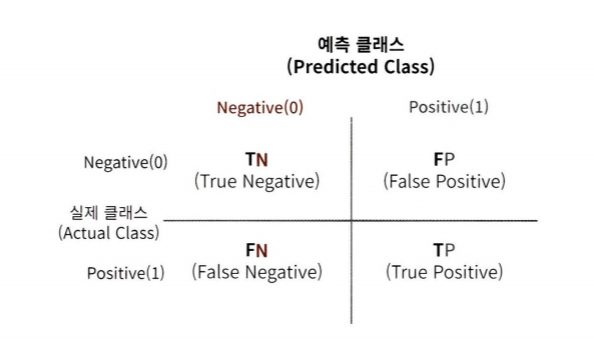
TN, FP. FN, TP는 예측 클래스와 실제 클래스의 Positive 결정 값（값 1）과 Negative 결정 값（값 0）의
결합에 따라 결정됨. 예를 들어 TN은 True Negative의 의미이며 앞 True는 예측 클래스 값과 실
제 클래스 값이 같다는 의미고 뒤의 Negative는 예측값이 Negative 값이라는 의미. 즉. TN은
예측을 Negative 값 0으로 예측했는데. 실제 값도 Negative 값 0이라는 의미. TN, FP. FN. TP
기호가 의미하는 것은 앞 문자 Triie/False는 예측값과 실제값이 '같은가/틀린가'를 의미. 뒤 문
자 Negative/Positive는 예측 결과 값이 부정（0）/긍정（1）을 의미<br><br>
사이킷런은 오차 행렬을 구하기 위해 confusion_matrix( ) API를 제공

In [10]:
from sklearn.metrics import confusion_matrix

# 앞절의 예측 결과인 fakepred와 실제 결과인 y_test의 Confusion Matrix출력
confusion_matrix(y_test , fakepred)

#이진 분류의 TN. FP. FN, FP는 상단 도표와 동일한 위치를 가지고 array에서 가져올 수 있음

array([[405,   0],
       [ 45,   0]], dtype=int64)

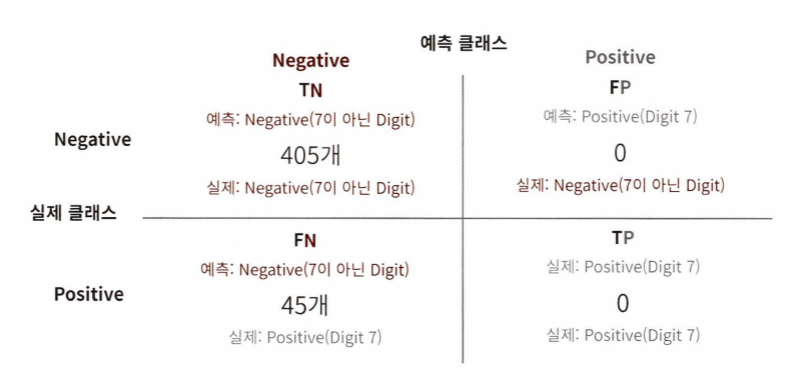
TP. TN, FP. TN 값은 Classifier 성능의 여러 면모를 판단할 수 있는 기반 정보를 제공하는데, 이 값을
조합해 Classifier의 성능을 측정할 수 있는 주요 지표인 정확도(Accuracy), 정밀도(Precision), 재현
율(Recall) 값을 알 수 있음.<br>
=> **정확도 = 예측 결과와 실제 값이 동일한 건수/전체 데이터 수 = (TN + TP)/(TN + FP + FN + TP)**

---

**03. 정밀도와 재현율**<br>
Positive 데이터 세트의 예측 성능에 좀 더 초점을 맞춘 평가 지표<br>
*앞서 만든
MyFakeClassifier Positive로 예측한 TP 값이 하나도 없기 때문에 정밀도와 재현율 값이 모두 0*<br>
* **{ 정밀도 = TP / (FP + TP) }**<br>
>정밀도는 예측을 Positive로 한 대상 중에 예측과 실제 값이 Positive로 일치한 데이터의 비율. 공식의 분모인 FP + TP는 예측을 Positive로 한 모든 데이터 건수이며. 공식의 분자인 TP는 예측과 실제 값이 Positive로 일치한 데이터 건수.  Positive 예측 성능을 더욱 정밀하게 측정하기 위한 평가 지표로 양성 예측도라고도 함.<br> 
* **{ 재현율 = TP / (FN + TP) }**<br>
>재현율은 실제 값이 Positive인 대상 중에 예측과 실제 값이 Positive로 일치한 데이터의 비율.
식의 분모인 FN 十 TP는 실제 값이 Positive인 모든 데이터 건수이며 공식의 분자인 TP는 예
측과 실제 값이 Positive로 일치한 데이터 건수. 민감도(Sensitivity) 또는 TPR(True Positive
Rate)라고도 함.


정밀도와 재현율 지표 중에 이진 분류 모델의 업무 특성에 따라서 특정 평가 지표가 더 중요한 지표로
간주될 수 있음.  보통은 재현율이 정밀도보다 상대적으로 중요한 업무가 많음<br>
* 재현율이 상대적으로 더 중요한 지표인 경우는 실제 Positive 양성인 데이터 예측을 Negative로 잘못 판단하게 되면 업무상 큰 영향이 발생하는 경우
> ex) 암 판단 모델, 보험 사기와 같은 금융 사기 적발 모델도
* 정밀도가 상대적으로 더 중요한 지표인 경우는 실제 Negative 음성인 데이터 예측을 Positive 양성으로 잘못 판단하게 되면 업무상 큰 영향이 발생하는 경우
> ex) 스팸메일 여부를 판단하는 모델

다시 한번 재현율과 정밀도의 공식을 살펴보면, 재현을 = TP / (FN + TP), 정밀도 = TP /(FP 十
TP).

재현율과 정밀도 모두 TP를 높이는 데 동일하게 초점을 맞추지만, 재현율은 FN(실제
Positive, 예측 Negative)를 낮추는 데, 정밀도는 FP를 낮추는 데 초점을 맞춤. 이 같은 특성 때문
에 재현율과 정밀도는 **서로 보완적인 지표로 분류의 성능을 평가하는 데 적용됨.** 가장 좋은 성능
평가는 재현율과 정밀도 모두 높은 수치를 얻는 것. 반면에 둘 중 어느 한 평가 지표만 매우 높
고, 다른 수치는 매우 낮은 결과를 나타내는 경우는 바람직하지 않음.


In [12]:
#MyFakeClassifier의 예측 결과로 정밀도와 재현율 측정
from sklearn.metrics import accuracy_score, precision_score , recall_score

print("정밀도:", precision_score(y_test, fakepred))
print("재현율:", recall_score(y_test, fakepred))


정밀도: 0.0
재현율: 0.0


C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [13]:
##오차행렬, 정확도, 정밀도, 재현율을 한꺼번에 계산하는 함수 생성

from sklearn.metrics import accuracy_score, precision_score , recall_score , confusion_matrix

def get_clf_eval(y_test , pred):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}'.format(accuracy , precision ,recall))

In [15]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression

# 원본 데이터를 재로딩, 데이터 가공, 학습데이터/테스트 데이터 분할. 
titanic_df = pd.read_csv("C:\\Users\\Administrator\\Documents\\titanic_train.csv", encoding = "cp949", engine = "python")
y_titanic_df = titanic_df['Survived']
X_titanic_df= titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, \
                                                    test_size=0.20, random_state=11)

lr_clf = LogisticRegression()

lr_clf.fit(X_train , y_train)
pred = lr_clf.predict(X_test)
get_clf_eval(y_test , pred)

오차 행렬
[[108  10]
 [ 14  47]]
정확도: 0.8659, 정밀도: 0.8246, 재현율: 0.7705


C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


***정밀도/재현율 트레이드오프***<br>
분류하려는 업무의 특성상 정밀도 또는 재현율이 특별히 강조돼야 할 경우 분류의 결정 임곗값
(Threshold)을 조정해 정밀도 또는 재현율의 수치를 높일 수 있음. 하지만 정밀도와 재현율은 상
호 보완적인 평가 지표이기 때문에 어느 한쪽을 강제로 높이면 다른 하나의 수치는 떨어지기 쉽다.
이를 정밀도/재현율의 트레이드오프(Trade-off)!<br><br>
사이킷런의 분류 알고리즘은 예측 데이터가특정 레이블(Label, 결정 클래스 값)에 속하는지를 계산하
기 위해 먼저 개별 레이블별로 결정 확률을 구한다. 그리고 예측 확률이 큰 레이블값으로 예측하게
됩니다. 가령 이진 분류 모델에서 특정 데이터가 0이 될 확률이 10%, 1이 될 확률이 90%로 예측됐다면 최종 예측은 더 큰 확률을 가진. 즉 90% 확률을 가진 1로 예측. 일반적으로 이진 분류에서는
이 임 곗값을 0.5, 즉 50%로 정하고 이 기준 값보다 확률이 크면 Positive. 작으면 Negative로 결정함


사이킷런은 개별 데이터별로 예측 확률을 반환하는 메서드인 predict_proba( )를 제공
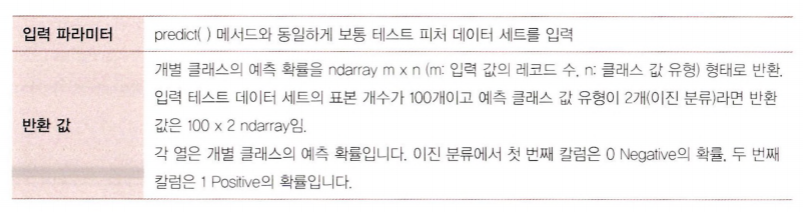
predict() 메서드와 유사하지만 단지 반환 결과가 예측 결과 클래스값이 아닌 예측 확률 결과

In [16]:
#predict_proba( ) 메소드 확인
pred_proba = lr_clf.predict_proba(X_test)
pred  = lr_clf.predict(X_test)
print('pred_proba()결과 Shape : {0}'.format(pred_proba.shape))
print('pred_proba array에서 앞 3개만 샘플로 추출 \n:', pred_proba[:3])

# 예측 확률 array 와 예측 결과값 array 를 concatenate 하여 예측 확률과 결과값을 한눈에 확인
pred_proba_result = np.concatenate([pred_proba , pred.reshape(-1,1)],axis=1)
print('두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 \n',pred_proba_result[:3])

pred_proba()결과 Shape : (179, 2)
pred_proba array에서 앞 3개만 샘플로 추출 
: [[0.44935228 0.55064772]
 [0.86335513 0.13664487]
 [0.86429645 0.13570355]]
두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 
 [[0.44935228 0.55064772 1.        ]
 [0.86335513 0.13664487 0.        ]
 [0.86429645 0.13570355 0.        ]]


In [17]:
#Binarizer 활용
#사이킷런은 분류 결정 임곗값을 조절해 정밀도와 재현율의 성능 수치를 상호 보완적으로 조정할 수있음


from sklearn.preprocessing import Binarizer

X = [[ 1, -1,  2],
     [ 2,  0,  0],
     [ 0,  1.1, 1.2]]

# threshold 기준값보다 같거나 작으면 0을, 크면 1을 반환
binarizer = Binarizer(threshold=1.1)                     
print(binarizer.fit_transform(X))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [18]:
#분류 결정 임계값 0.5 기반에서 Binarizer를 이용하여 예측값 변환

from sklearn.preprocessing import Binarizer

#Binarizer의 threshold 설정값. 분류 결정 임곗값임.  
custom_threshold = 0.5

# predict_proba( ) 반환값의 두번째 컬럼 , 즉 Positive 클래스 컬럼 하나만 추출하여 Binarizer를 적용
pred_proba_1 = pred_proba[:,1].reshape(-1,1)

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1) 
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차 행렬
[[108  10]
 [ 14  47]]
정확도: 0.8659, 정밀도: 0.8246, 재현율: 0.7705


In [22]:
#분류 결정 임계값 0.4 기반에서 Binarizer를 이용하여 예측값 변환

# Binarizer의 threshold 설정값을 0.4로 설정. 즉 분류 결정 임곗값을 0.5에서 0.4로 낮춤  
custom_threshold = 0.4
pred_proba_1 = pred_proba[:,1].reshape(-1,1)
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1) 
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test , custom_predict)

오차 행렬
[[97 21]
 [11 50]]
정확도: 0.8212, 정밀도: 0.7042, 재현율: 0.8197


=> 임곗값을 낮추니 재현율 값이 올라가고 정밀도가 떨어짐. 분류 결정 임곗값은
Positive 예측값을 결정하는 확률의 기준이 되기때문.
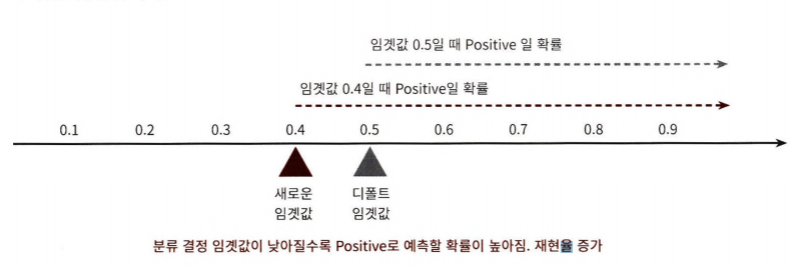

Positive 예측값이 많아지면 상대적으로 재현율 값이 높아짐. 양성 예측을 많이 하다 보니 실제 양
성을 음성으로 예측하는 횟수가 상대적으로 줄어들기 때문
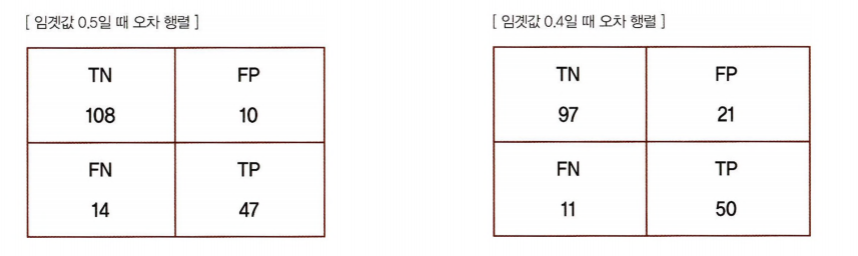

In [20]:
#여러개의 분류 결정 임곗값을 변경하면서 Binarizer를 이용하여 예측값 변환

# 테스트를 수행할 모든 임곗값을 리스트 객체로 저장. 
thresholds = [0.4, 0.45, 0.50, 0.55, 0.60]

def get_eval_by_threshold(y_test , pred_proba_c1, thresholds):
    # thresholds list객체내의 값을 차례로 iteration하면서 Evaluation 수행.
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1) 
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임곗값:',custom_threshold)
        get_clf_eval(y_test , custom_predict)

get_eval_by_threshold(y_test ,pred_proba[:,1].reshape(-1,1), thresholds )

#재현율을 향상시키면서 다른 수치를 어느 정도 감소하는 희생을 해야 한다면 임곗값 0.45가 가장 적당해보임

임곗값: 0.4
오차 행렬
[[97 21]
 [11 50]]
정확도: 0.8212, 정밀도: 0.7042, 재현율: 0.8197
임곗값: 0.45
오차 행렬
[[105  13]
 [ 13  48]]
정확도: 0.8547, 정밀도: 0.7869, 재현율: 0.7869
임곗값: 0.5
오차 행렬
[[108  10]
 [ 14  47]]
정확도: 0.8659, 정밀도: 0.8246, 재현율: 0.7705
임곗값: 0.55
오차 행렬
[[111   7]
 [ 16  45]]
정확도: 0.8715, 정밀도: 0.8654, 재현율: 0.7377
임곗값: 0.6
오차 행렬
[[113   5]
 [ 17  44]]
정확도: 0.8771, 정밀도: 0.8980, 재현율: 0.7213


In [21]:
#precision_recall_curve( ) 를 이용하여 임곗값에 따른 정밀도-재현율 값 추출

from sklearn.metrics import precision_recall_curve

# 레이블 값이 1일때의 예측 확률을 추출 
pred_proba_class1 = lr_clf.predict_proba(X_test)[:, 1] 

# 실제값 데이터 셋과 레이블 값이 1일 때의 예측 확률을 precision_recall_curve 인자로 입력 
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1 )
# ytrue： 실제 클래스값 배열 ( 배열 크기= ［데이터 건수］)
# probas_pred： Positive 칼럼의 예즉 확률 배열 ( 배열 크기= ［데이터 건수］)
print('반환된 분류 결정 임곗값 배열의 Shape:', thresholds.shape)
print('반환된 precisions 배열의 Shape:', precisions.shape)
print('반환된 recalls 배열의 Shape:', recalls.shape)

print("thresholds 5 sample:", thresholds[:5])
print("precisions 5 sample:", precisions[:5])
print("recalls 5 sample:", recalls[:5])

#반환된 임계값 배열 로우가 147건이므로 샘플로 10건만 추출하되, 임곗값을 15 Step으로 추출. 
thr_index = np.arange(0, thresholds.shape[0], 15)
print('샘플 추출을 위한 임계값 배열의 index 10개:', thr_index)
print('샘플용 10개의 임곗값: ', np.round(thresholds[thr_index], 2))

# 15 step 단위로 추출된 임계값에 따른 정밀도와 재현율 값 
print('샘플 임계값별 정밀도: ', np.round(precisions[thr_index], 3))
print('샘플 임계값별 재현율: ', np.round(recalls[thr_index], 3))

반환된 분류 결정 임곗값 배열의 Shape: (147,)
반환된 precisions 배열의 Shape: (148,)
반환된 recalls 배열의 Shape: (148,)
thresholds 5 sample: [0.11573101 0.11636721 0.11819211 0.12102773 0.12349478]
precisions 5 sample: [0.37888199 0.375      0.37735849 0.37974684 0.38216561]
recalls 5 sample: [1.         0.98360656 0.98360656 0.98360656 0.98360656]
샘플 추출을 위한 임계값 배열의 index 10개: [  0  15  30  45  60  75  90 105 120 135]
샘플용 10개의 임곗값:  [0.12 0.13 0.15 0.17 0.26 0.38 0.49 0.63 0.76 0.9 ]
샘플 임계값별 정밀도:  [0.379 0.424 0.455 0.519 0.618 0.676 0.797 0.93  0.964 1.   ]
샘플 임계값별 재현율:  [1.    0.967 0.902 0.902 0.902 0.82  0.77  0.656 0.443 0.213]


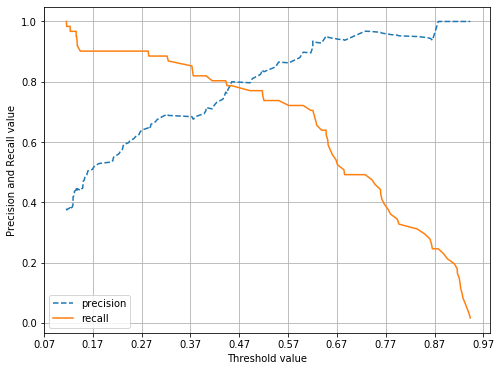

In [23]:
# 임곗값의 변경에 따른 정밀도-재현율 변화 곡선을 그림

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test , pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출. 
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()
    
precision_recall_curve_plot( y_test, lr_clf.predict_proba(X_test)[:, 1] )

=> 임곗값을 계속 증가시킬수록 재현율 값이 낮아지고 정밀도 값이 높아지는 반대의 양상. 앞 예
제의 로지스틱 회귀 기반의 타이타닉 생존자 예측 모델의 경우 임곗값이 약 0.45 지점에서 재현율과 정
밀도가 비슷해지는 모습을 보임

***정밀도와 재현율의 맹점***<br>
Positive 예측의 임곗값을 변경함에 따라 정밀도와 재현율의 수치가 변경됨. 임곗값의 이러한 변경은 업무 환경에 맞게 두 개의 수치를 상호 보완할 수 있는 수준에서 적용돼야 함. 그렇지 않고 단순히 하나의 성능 지표 수치를 높이기 위한 수단으로 사용돼서는 안 된다. 다음은
정밀도 또는 재현율 평가 지표 수치 중 하나를 극단적으로 높이는 방법이지만 숫자 놀음에 불과한 방법
* 정밀도가 100%가 되는 방법
> 확실한 기준이 되는 경우만 Positive로 예측하고 나머 지는 모두 Negative로 예측합니다. 예를 들어 환
자가 80세 이상이고 비만이며 이전에 암 진단을 받았고 암 세포의 크기가 상위 0.1% 이상이면 무조건
Positive, 다른 경우는 Negative로 예측하는 겁 니다.
정밀도 = TP / (TP + FP)입니다. 전체 환자 1000명 중 확실한 Positive 징후만 가진 환자는 단 1 명이
라고 하면 이 한 명만 Positive로 예측하고 나머지는 모두 Negative로 예측하더 라도 FP는 0, TP는 1
이 되므로 정밀도는 1/(1+0)으로 100%가 됩니다.

* 재현율이 100%가 되는 방법 
>모든 환자를 Positive로 예측하면 됩니다. 재현율 = TP / (TP + FN)이므로 전체 환자 1000명을 다
Positive로 예측하는 겁니다. 이 중 실제 양성인 사람이 30명 정도라도 TN이 수치에 포함되지 않고 FN
은 아예 0이므로 30/(30 + 0)으로 100%가 됩니다.

이처럼 정밀도와 재현율 성능 수치도 어느 한쪽만 참조하면 극단적인 수치 조작이 가능. 따라서
정밀도 또는 재현율 중 하나만 스코어가 좋고 다른 하나는 스코어가 나쁜 분류는 성능이 좋지 않은 분
류로 간주할 수 있다. 물론 앞의 예제에서와 같이 분류가 정밀도 또는 재현율 중 하나에 상대적인
중요도를 부여해 각 예측 상황에 맞는 분류 알고리즘을 튜닝할 수 있지만. 그렇다고 정밀도/재현율 중
하나만 강조하는 상황이 돼서는 안 된다.<br><br>
정밀도와 재현율의 수치가 적절하게 조합돼 분류의 종합적인 성능 평가에 사용될 수 있는 평가 지표가
필요

---

**04. F1 스코어** <br>
F1 스코어(Score)는 정밀도와 재현율을 결합한 지표. F1 스코어는 정밀도와 재현율이 어느 한
쪽으로 치우치지 않는 수치를 나타낼 때 상대적으로 높은 값
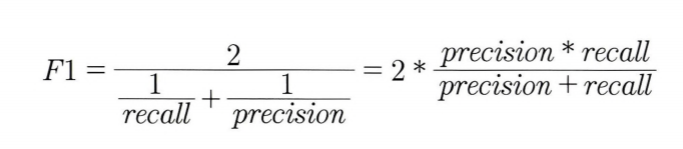
사이킷런은 F1 스코어를 구하기 위해 fl_score()라는 API를 제공

In [25]:
from sklearn.metrics import f1_score 
f1 = f1_score(y_test , pred)
print('F1 스코어: {0:.4f}'.format(f1))

F1 스코어: 0.7966


In [26]:
def get_clf_eval(y_test , pred):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    # F1 스코어 추가
    f1 = f1_score(y_test,pred)
    print('오차 행렬')
    print(confusion)
    # f1 score print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}'.format(accuracy, precision, recall, f1))

thresholds = [0.4 , 0.45 , 0.50 , 0.55 , 0.60]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.4
오차 행렬
[[97 21]
 [11 50]]
정확도: 0.8212, 정밀도: 0.7042, 재현율: 0.8197, F1:0.7576
임곗값: 0.45
오차 행렬
[[105  13]
 [ 13  48]]
정확도: 0.8547, 정밀도: 0.7869, 재현율: 0.7869, F1:0.7869
임곗값: 0.5
오차 행렬
[[108  10]
 [ 14  47]]
정확도: 0.8659, 정밀도: 0.8246, 재현율: 0.7705, F1:0.7966
임곗값: 0.55
오차 행렬
[[111   7]
 [ 16  45]]
정확도: 0.8715, 정밀도: 0.8654, 재현율: 0.7377, F1:0.7965
임곗값: 0.6
오차 행렬
[[113   5]
 [ 17  44]]
정확도: 0.8771, 정밀도: 0.8980, 재현율: 0.7213, F1:0.8000


=> F1 스코어는 임곗값이 0.6일 때 가장 좋은
값을 보여주지만 임곗값이 0.6인 경우에는 재현율이 크게 감소하고 있으니 주의

---

**05. ROC 곡선과 AUC**<br>
ROC 곡선과 이에 기반한 AUC 스코어는 이진 분류의 예측 성능 측정에서 중요하게 사용되는 지표(수신자 판단 곡선). 일반적으로 의학 분야에서 많이 사용되지만, 머신러닝의 이진 분류 모델의 예즉 성능을 판단
하는 중요한 평가 지표.<br>
ROC 곡선은 FPR(False Positive Rate)이 변할 때 TPR(True
Positive Rate)이 어떻게 변하는지를 나타내는 곡선. FPR을 X 축으로, TPR을 Y 축으로 잡으면
FPR의 변화에 따른 TPR의 변화가 곡선 형태로 나타남.

* 민감도(TPR)는 실제값 Positive(양성)가 정확히 예측돼야 하는 수준을 나타냄(질병이 있는 사람은 질병이 있는 것으로 양성 판정).
* 특이성(TNR)은 실제값 Negative(음성)가 정확히 예측돼야 하는 수준을 나타냄(질병이 없는 건강한 사람은 질병이 없는 것으로 음성 판정).
>TNR = TN / ( FP + TN ). 그
리고 ROC 곡선의 X 축 기준인 FPR(False Positive Rate)은 FP / ( FP 十 TN)이므로 1 - TNR 또는
1 - 특이성으로표현됨<br>**FPR = FP / (FP + TN) = 1 - TNR = 1- 특이성**

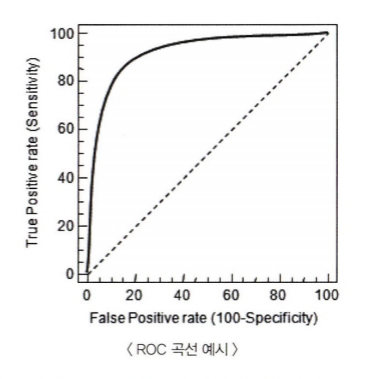
가운데 직선은 ROC 곡선의 최저 값. 왼쪽 하단과 오른쪽 상단을 대각선으로 이은 직선은 동전을 무작위로 던져 앞/뒤를 맞추는
랜덤 수준의 이진 분류의 ROC 직선(AUC는 0.5
임). ROC 곡선이 가운데 직선에 가까울수록 성능이 떨
어지는 것이며. 멀어질수록 성능이 뛰어난 것

In [27]:
## 임곗값을 1부터 0까지 변화시키면서 FPR을 구하고 이 FPR 값의 변화에 따른 TPR 값을 구하는 것이 ROC 곡선
from sklearn.metrics import roc_curve

# 레이블 값이 1일때의 예측 확률을 추출 
pred_proba_class1 = lr_clf.predict_proba(X_test)[:, 1] 

fprs , tprs , thresholds = roc_curve(y_test, pred_proba_class1)
# 반환된 임곗값 배열에서 샘플로 데이터를 추출하되, 임곗값을 5 Step으로 추출. 
# thresholds[0]은 max(예측확률)+1로 임의 설정됨. 이를 제외하기 위해 np.arange는 1부터 시작
thr_index = np.arange(1, thresholds.shape[0], 5)
print('샘플 추출을 위한 임곗값 배열의 index:', thr_index)
print('샘플 index로 추출한 임곗값: ', np.round(thresholds[thr_index], 2))

# 5 step 단위로 추출된 임계값에 따른 FPR, TPR 값
print('샘플 임곗값별 FPR: ', np.round(fprs[thr_index], 3))
print('샘플 임곗값별 TPR: ', np.round(tprs[thr_index], 3))

샘플 추출을 위한 임곗값 배열의 index: [ 1  6 11 16 21 26 31 36 41 46]
샘플 index로 추출한 임곗값:  [0.94 0.73 0.62 0.52 0.44 0.28 0.15 0.14 0.13 0.12]
샘플 임곗값별 FPR:  [0.    0.008 0.025 0.076 0.127 0.254 0.576 0.61  0.746 0.847]
샘플 임곗값별 TPR:  [0.016 0.492 0.705 0.738 0.803 0.885 0.902 0.951 0.967 1.   ]


In [28]:
from sklearn.metrics import roc_curve

# 레이블 값이 1일때의 예측 확률을 추출 
pred_proba_class1 = lr_clf.predict_proba(X_test)[:, 1] 
print('max predict_proba:', np.max(pred_proba_class1))

fprs , tprs , thresholds = roc_curve(y_test, pred_proba_class1)
print('thresholds[0]:', thresholds[0])
# 반환된 임곗값 배열 로우가 47건이므로 샘플로 10건만 추출하되, 임곗값을 5 Step으로 추출. 
thr_index = np.arange(0, thresholds.shape[0], 5)
print('샘플 추출을 위한 임곗값 배열의 index 10개:', thr_index)
print('샘플용 10개의 임곗값: ', np.round(thresholds[thr_index], 2))

# 5 step 단위로 추출된 임계값에 따른 FPR, TPR 값
print('샘플 임곗값별 FPR: ', np.round(fprs[thr_index], 3))
print('샘플 임곗값별 TPR: ', np.round(tprs[thr_index], 3))

max predict_proba: 0.943262794352988
thresholds[0]: 1.943262794352988
샘플 추출을 위한 임곗값 배열의 index 10개: [ 0  5 10 15 20 25 30 35 40 45]
샘플용 10개의 임곗값:  [1.94 0.87 0.63 0.55 0.44 0.32 0.15 0.14 0.13 0.12]
샘플 임곗값별 FPR:  [0.    0.008 0.025 0.059 0.127 0.203 0.559 0.602 0.695 0.847]
샘플 임곗값별 TPR:  [0.    0.246 0.672 0.738 0.787 0.885 0.902 0.951 0.967 0.984]


=> roc_ciirve()의 결과를 살펴보면 임곗값이 1 에 가까운 값에서 점점 작아지면서 FPM이 점점 커짐.
그리고 FPR이 조금씩 커질 때 TPR은 가파르게 커짐

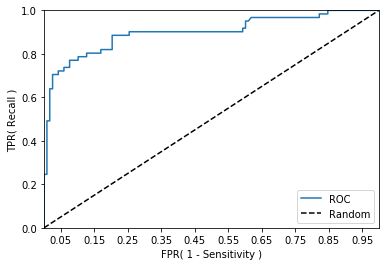

In [29]:
# AUC 수치가 커지려면 FPR이 작은 상태에서 얼마나 큰 TPR을 얻을 수 있느냐가 관건
def roc_curve_plot(y_test , pred_proba_c1):
    # 임곗값에 따른 FPR, TPR 값을 반환 받음. 
    fprs , tprs , thresholds = roc_curve(y_test ,pred_proba_c1)

    # ROC Curve를 plot 곡선으로 그림. 
    plt.plot(fprs , tprs, label='ROC')
    # 가운데 대각선 직선을 그림. 
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    
    # FPR X 축의 Scale을 0.1 단위로 변경, X,Y 축명 설정등   
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )'); plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()
    
roc_curve_plot(y_test, lr_clf.predict_proba(X_test)[:, 1] )

In [30]:
from sklearn.metrics import roc_auc_score

### 아래는 roc_auc_score()의 인자를 잘못 입력한 것으로, 책에서 수정이 필요한 부분입니다. 
### 책에서는 roc_auc_score(y_test, pred)로 예측 타겟값을 입력하였으나 
### roc_auc_score(y_test, y_score)로 y_score는 predict_proba()로 호출된 예측 확률 ndarray중 Positive 열에 해당하는 ndarray입니다. 

#pred = lr_clf.predict(X_test)
#roc_score = roc_auc_score(y_test, pred)

pred_proba = lr_clf.predict_proba(X_test)[:, 1]
roc_score = roc_auc_score(y_test, pred_proba)
print('ROC AUC 값: {0:.4f}'.format(roc_score))

ROC AUC 값: 0.8987


In [32]:

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
          F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

---

**06. 피마 인디언 당뇨병 예측**

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

diabetes_data = pd.read_csv("C:\\Users\\Administrator\\Downloads\\diabetes.csv", encoding = "cp949", engine = "python")
print(diabetes_data['Outcome'].value_counts())
diabetes_data.head(3)

0    500
1    268
Name: Outcome, dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [36]:
diabetes_data.info( )
#Null 값은 없으며 피처의 타입은 모두 숫자형. 
#임신 횟수, 나이와 같은 숫자형 피처와 당뇨 검사 수치 피처로 구성된 특징으로 볼 때 별도의 피처 인코딩은 필요하지 않아 보임

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [37]:
# 수정된 get_clf_eval() 함수 
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [38]:
def precision_recall_curve_plot(y_test=None, pred_proba_c1=None):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출. 
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()

In [39]:
# 피처 데이터 세트 X, 레이블 데이터 세트 y를 추출. 
# 맨 끝이 Outcome 컬럼으로 레이블 값임. 컬럼 위치 -1을 이용해 추출 
X = diabetes_data.iloc[:, :-1]
y = diabetes_data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 156, stratify=y)

# 로지스틱 회귀로 학습,예측 및 평가 수행. 
lr_clf = LogisticRegression()
lr_clf.fit(X_train , y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:, 1]

get_clf_eval(y_test , pred, pred_proba)
# 전체 데이터의 65%가 Negative이므로 정확도보다는 재현율 성능에 조금 더 초점

오차 행렬
[[87 13]
 [22 32]]
정확도: 0.7727, 정밀도: 0.7111, 재현율: 0.5926,    F1: 0.6465, AUC:0.8083


C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


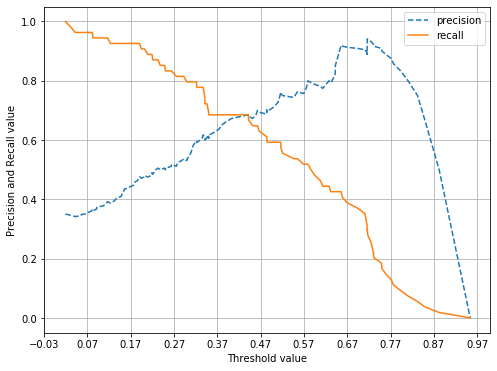

In [40]:
pred_proba_c1 = lr_clf.predict_proba(X_test)[:, 1]
precision_recall_curve_plot(y_test, pred_proba_c1)

#재현율 곡선을 보면 임곗값을 0.42 정도로 낮추면 정밀도와 재현율이 어느 정도 균형을 맞출 것 같다. 
#하지만 두 개의 지표 모두 0.7이 안 되는 수치로 보임. 여전히 두 지표의 값이 낮습니다. 

In [41]:
# 임곗값을 인위적으로 조작하기 전에 다시 데이터 값을 점검 
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


(array([  5.,   0.,   4.,  32., 156., 211., 163.,  95.,  56.,  46.]),
 array([  0. ,  19.9,  39.8,  59.7,  79.6,  99.5, 119.4, 139.3, 159.2,
        179.1, 199. ]),
 <a list of 10 Patch objects>)

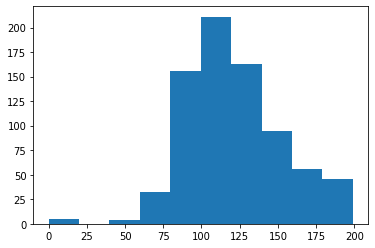

In [42]:
plt.hist(diabetes_data['Glucose'], bins=10)

In [43]:
# 0값을 검사할 피처명 리스트 객체 설정
zero_features = ['Glucose', 'BloodPressure','SkinThickness','Insulin','BMI']

# 전체 데이터 건수
total_count = diabetes_data['Glucose'].count()

# 피처별로 반복 하면서 데이터 값이 0 인 데이터 건수 추출하고, 퍼센트 계산
for feature in zero_features:
    zero_count = diabetes_data[diabetes_data[feature] == 0][feature].count()
    print('{0} 0 건수는 {1}, 퍼센트는 {2:.2f} %'.format(feature, zero_count, 100*zero_count/total_count))

Glucose 0 건수는 5, 퍼센트는 0.65 %
BloodPressure 0 건수는 35, 퍼센트는 4.56 %
SkinThickness 0 건수는 227, 퍼센트는 29.56 %
Insulin 0 건수는 374, 퍼센트는 48.70 %
BMI 0 건수는 11, 퍼센트는 1.43 %


In [44]:
# 전체 데이터 건수가 많지 않기 때문에 이들 데이터를 일괄적으로 삭제할 경우에는 학습을 효과적으로 수행하기 어려울 것 같다. 
#위 피처의 0 값을 평균값으로 대체
# zero_features 리스트 내부에 저장된 개별 피처들에 대해서 0값을 평균 값으로 대체
diabetes_data[zero_features]=diabetes_data[zero_features].replace(0, diabetes_data[zero_features].mean())

In [45]:
X = diabetes_data.iloc[:, :-1]
y = diabetes_data.iloc[:, -1]

# 로지스틱 회귀의 경우 일반적으로 숫자 데이터에 스케일링을 적용하는 것이 좋습니다. 
# StandardScaler 클래스를 이용해 피처 데이터 세트에 일괄적으로 스케일링 적용
scaler = StandardScaler( )
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 156, stratify=y)

# 로지스틱 회귀로 학습, 예측 및 평가 수행. 
lr_clf = LogisticRegression()
lr_clf.fit(X_train , y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:, 1]

get_clf_eval(y_test , pred, pred_proba)

오차 행렬
[[90 10]
 [21 33]]
정확도: 0.7987, 정밀도: 0.7674, 재현율: 0.6111,    F1: 0.6804, AUC:0.8433


C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


=> 데이터 변환과 스케일링을 통해 성능 수치가 일정 수준 개선됐습니다. 로지스틱 회귀에 대해 본격적으
로 학습하지 않았으니 하이퍼 파라미터에 대한 튜닝은 생략하겠습니다. 하지만 여전히 재현율 수치는
개선이 필요해 보입니다. 분류 결정 임곗값을 변화시키면서 재현율 값의 성능 수치가 어느 정도나 개선
되는지 확인해 보겠습니다.

In [46]:
from sklearn.preprocessing import Binarizer

def get_eval_by_threshold(y_test , pred_proba_c1, thresholds):
    # thresholds 리스트 객체내의 값을 차례로 iteration하면서 Evaluation 수행.
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1) 
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임곗값:',custom_threshold)
        get_clf_eval(y_test , custom_predict, pred_proba_c1)

In [47]:
thresholds = [0.3 , 0.33 ,0.36,0.39, 0.42 , 0.45 ,0.48, 0.50]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds )

임곗값: 0.3
오차 행렬
[[65 35]
 [11 43]]
정확도: 0.7013, 정밀도: 0.5513, 재현율: 0.7963,    F1: 0.6515, AUC:0.8433
임곗값: 0.33
오차 행렬
[[71 29]
 [11 43]]
정확도: 0.7403, 정밀도: 0.5972, 재현율: 0.7963,    F1: 0.6825, AUC:0.8433
임곗값: 0.36
오차 행렬
[[76 24]
 [15 39]]
정확도: 0.7468, 정밀도: 0.6190, 재현율: 0.7222,    F1: 0.6667, AUC:0.8433
임곗값: 0.39
오차 행렬
[[78 22]
 [16 38]]
정확도: 0.7532, 정밀도: 0.6333, 재현율: 0.7037,    F1: 0.6667, AUC:0.8433
임곗값: 0.42
오차 행렬
[[84 16]
 [18 36]]
정확도: 0.7792, 정밀도: 0.6923, 재현율: 0.6667,    F1: 0.6792, AUC:0.8433
임곗값: 0.45
오차 행렬
[[85 15]
 [18 36]]
정확도: 0.7857, 정밀도: 0.7059, 재현율: 0.6667,    F1: 0.6857, AUC:0.8433
임곗값: 0.48
오차 행렬
[[88 12]
 [19 35]]
정확도: 0.7987, 정밀도: 0.7447, 재현율: 0.6481,    F1: 0.6931, AUC:0.8433
임곗값: 0.5
오차 행렬
[[90 10]
 [21 33]]
정확도: 0.7987, 정밀도: 0.7674, 재현율: 0.6111,    F1: 0.6804, AUC:0.8433


=> 정확도와 정밀도를 희생하고 재현율을 높이는 데 가장 좋은 임곗값은 0.33으로,
재현율 값이 0.7963이다. 하지만 정밀도가 0.5972로 매우 저조해졌으니 극단적인 선택으로 보임. 임곗값 0.48이 전체적인 성능 평가 지표를 유지하면서 재현율을 약간 향상시키는 좋은 임곗값으
로 보인다. 임곗값 0.48일 경우 정확도는 0.7987, 정밀도는 0.7447. 재현율은 0.6481. F1 스코어는
0.6931. ROC AUC는 0.8433.<br><br>
앞에서 학습된 로지스틱 회귀 모델을 이용해 임곗값을 0.48로 낮춘 상태에서 아래에서 다시 예측. 사이킷런의 predict() 메서드는 임곗값을 마음대로 변환할 수 없으므로 별도의 로직으로 이를 구해야 한다.

In [48]:
# Binarizer 클래스를 이용해 preclict_proba( )로 추출한 예측 결과 확률값을 변환해 변경된 임곗값에 따른 예측 클래스 값을 구해 보기
# 임곗값를 0.48로 설정한 Binarizer 생성
binarizer = Binarizer(threshold=0.48)

# 위에서 구한 lr_clf의 predict_proba() 예측 확률 array에서 1에 해당하는 컬럼값을 Binarizer변환. 
pred_th_048 = binarizer.fit_transform(pred_proba[:, 1].reshape(-1,1)) 

get_clf_eval(y_test , pred_th_048, pred_proba[:, 1])

오차 행렬
[[88 12]
 [19 35]]
정확도: 0.7987, 정밀도: 0.7447, 재현율: 0.6481,    F1: 0.6931, AUC:0.8433


---

**07.정리**

지금까지 분류에 사용되는 **정확도. 오차 행렬, 정밀도, 재현율, F1 스코어, ROC-AUC**와 같은 성능 평
가 지표를 살펴봤다. 특히 이진 분류의 레이블 값이 불균형하게 분포될 경우(즉 0이 매우 많고, 1
이 매우 적을 경우 또는 반대의 경우) 단순히 예측 결과와 실제 결과가 일치하는 지표인 정확도만으로
는 머신러닝 모델의 예측 성능을 평가할 수 없다.<br>
* 오차 행렬은 Negative와 Positive 값을 가지는 실제 클래스 값과 예측 클래스 값이 True와 False에 따라 TN, FP, FN, TP로 매핑되는 4분면 행렬을 기반으로 예측 성능을 평가한다.
>정확도, 정밀도, 재현율 수치는 TN, FP, FN, TP 값을 다양하게 결합해 만들어지며, 이를 통해 분류 모델 예측 성능의 오류가 어떠한 모습으로 발생하는지 알 수 있는 것이다.<br><br>
* 정밀도(Precision)와 재현율(Recall)은 Positive 데이터 세트의 예측 성능에 좀 더 초점을 맞춘 평가 지표. 
>특히 재현율이 상대적으로 더 중요한 지표인 경우는 암 양성 예측 모델과 같이 실제 Positive 양성인 데이터 예측을 Negative로 잘못 판단하게 되면 업무상 큰 영향이 발생하는 경우. 분류하려는 업무의 특성상 정밀도 또는 재현율이 특별히 강조돼야 할 경우 분류의 결정 임곗값(Threshold)을 조정해 정밀도 또는 재현율의 수치를 높인다..
* F1 스코어는 정밀도와 재현율을 결합한 평가 지표이며, 정밀도와 재현율이 어느 한쪽으로 치우치지 않
을 때 높은 지표값. 
* ROC-AUC는 일반적으로 이진 분류의 성능 평가를 위해 가장 많이 사용되는 지표
>AUC(Area Under Curve) 값은 ROC 곡선 밑의 면적을 구한 것으로서 일반
적으로 1 에 가까울수록 좋은 수치 입 니 다.
